In [5]:
import numpy as np
import pandas as pd #used for working with datasets
import matplotlib.pyplot as plt
import seaborn as sns #visuzlization library
import re
import nltk  #natural language toolkit 

In [14]:
df = pd.read_csv('Restaurant_Reviews.tsv', sep='\t') #reads the data from the file and 'sep' seperates the data

In [16]:
df.info()   #basically gives us the info about the data(the column name, total number of data, and the type of data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [17]:
df.isnull().sum()  #gives us the sum of any null values in data

Review    0
Liked     0
dtype: int64

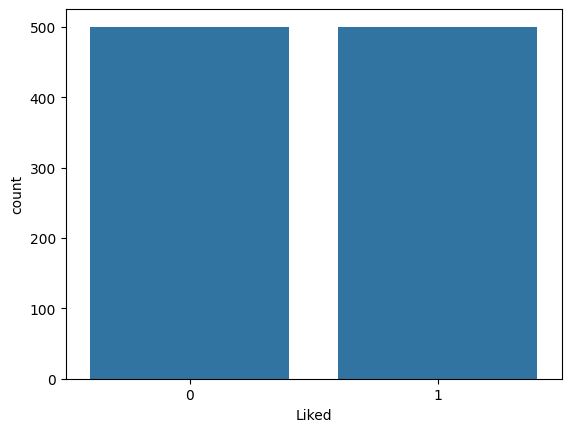

In [28]:
sns.countplot(x='Liked', data=df) #counts the total number of unique occurence in the column: "Liked", from the data
plt.show() #displays the plot

In [29]:
df['Review string length'] = df["Review"].apply(len) #here I created a new column in the dataframe, and the new column contains the length(number of characters) of each dataline
#if I want the total number of characters instead then, df["Review"].apply(len).sum()

In [30]:
df['Review string length'] #just printing the data

0       24
1       18
2       41
3       87
4       59
      ... 
995     66
996     24
997     50
998     91
999    134
Name: Review string length, Length: 1000, dtype: int64

In [31]:
df.info() #Since I created a new column, I get a new column in the dataframe called Review string length

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Review                1000 non-null   object
 1   Liked                 1000 non-null   int64 
 2   Review string length  1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


In [32]:
df.head(10)  #checking the data

,Review,Liked,Review string length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
5,Now I am getting angry and I want my damn pho.,0,46
6,Honeslty it didn't taste THAT fresh.),0,37
7,The potatoes were like rubber and you could te...,0,111
8,The fries were great too.,1,25
9,A great touch.,1,14


In [33]:
df.iloc[df['Review string length'].idxmax()]['Review'] #check notes.txt for the info about this

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [35]:
#if I just want to check the highest number of string count, then I can use this line of code instead
df['Review string length'].max()

149

In [36]:
#and if I just want the index for it, the instead of using max(), I can use idxmax()'

df["Review string length"].idxmax()

985

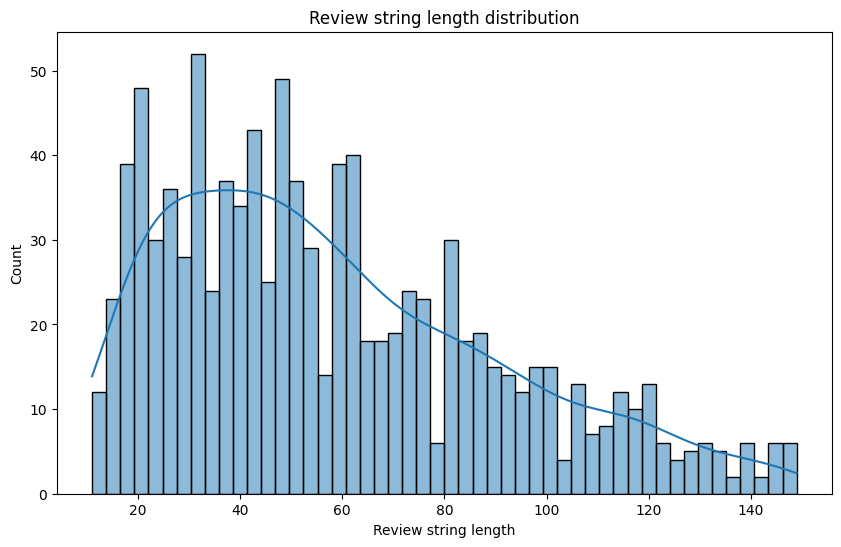

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Review string length'], bins=50, kde=True)
plt.xlabel('Review string length')
plt.title('Review string length distribution')
plt.show()

<AxesSubplot: xlabel='Review string length', ylabel='Density'>

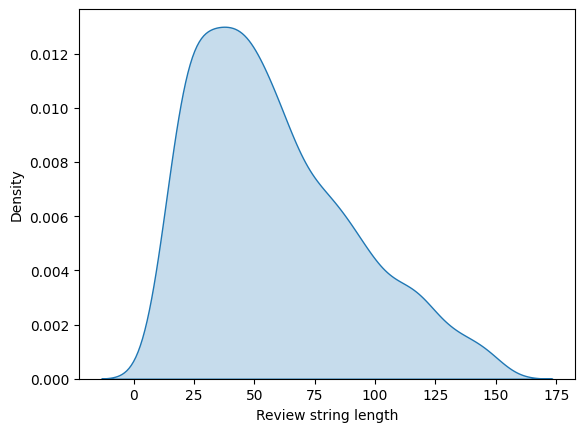

In [50]:
sns.kdeplot(df['Review string length'], fill=True) #creating a kernel density function
#https://www.youtube.com/watch?v=DCgPRaIDYXA This video tells more about this line of code

In [62]:
from nltk.corpus import stopwords #stopwords are the most commonly used words in english and it prints them 

from nltk.stem import PorterStemmer #it is an algorithm used to simplify words, for example: eating will be converted into eat


from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [101]:
def text_processing(text):
    text = re.sub('[^a-zA-Z]', ' ', text) #replaces every letter with a space which doesnt match the pattern
    text = text.lower()
    text = text.split() #adds a comma after every word

    ps = PorterStemmer()

    text = [ps.stem(word) for word in text if word not in set(stopwords.words('english'))] #first, it iterates through every word in "text" and checks if the word is in the stopwords, if it is not then it adds it to the sentence
    
    text = ' '.join(text)

    return text

In [102]:
corpus = df['Review'].apply(text_processing)

In [100]:
corpus

0                                         wow love place
1                                             crust good
2                                     tasti textur nasti
3      stop late may bank holiday rick steve recommen...
4                                select menu great price
                             ...                        
995                        think food flavor textur lack
996                               appetit instantli gone
997                         overal impress would go back
998    whole experi underwhelm think go ninja sushi n...
999    wast enough life pour salt wound draw time too...
Name: Review, Length: 1000, dtype: object

In [103]:
X = cv.fit_transform(corpus).toarray() #X will contain the document-term matrix, representing the text data in a numerical format
y = df['Liked'] #y will contain the target variable,

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  #here test_size means that 80% of the data will be used for training and the rest of the 20% of the data will be used for testing to determine the accuracy


In [117]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [122]:
y_pred = clf.predict(X_test) #get the result from the 20% of the remaining data that was reamining
clf.score(X_test,y_test) 

0.73

In [125]:
y_test.values

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1], dtype=int64)

In [145]:
new_review = "The food was really bad" #create a new review to be tested
new_review = text_processing(new_review) #process it 
new_review = cv.transform([new_review]).toarray()
clf.predict(new_review) #get the result

array([0], dtype=int64)

In [140]:
new_review = "The waiter was friendly"
new_review = text_processing(new_review)
new_review = cv.transform([new_review]).toarray()
clf.predict(new_review)

array([1], dtype=int64)

In [146]:
import joblib
joblib.dump(clf, 'restaurant_review_model.pkl')

#used for model deployment
#loaded_clf = joblib.load('restaurant_review_model.pkl')
# Now, loaded_clf can be used to make predictions on new data
#check notes on how to use it

['restaurant_review_model.pkl']